In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:\Python\Datasets\cars_dataset.csv', encoding='utf-8')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi


In [3]:
df.columns = df.columns.str.lower()
df.rename(columns={'fueltype': 'fuel type', 'enginesize': 'engine size'}, inplace=True)
df['make'] = df['make'].replace({'audi': 'Audi', 'vw': 'Volkswagen', 'toyota': 'Toyota', 'skoda': 'Skoda'})

In [5]:
group = df['make'].value_counts()

([<matplotlib.patches.Wedge at 0x2bb8988cb80>,
 [Text(0.7826852384749481, 0.772919023878578, 'Ford'),
  Text(-0.6611611392232708, 0.8791279474462104, 'Volkswagen'),
  Text(-1.078294058245904, -0.21744407085864426, 'BMW'),
  Text(-0.47006605787401906, -0.9945038467672106, 'Audi'),
  Text(0.33910175140149956, -1.0464272560462269, 'Toyota'),
  Text(0.8460023332773362, -0.7030505330979441, 'Skoda'),
  Text(1.0756538725074551, -0.2301494005200002, 'Hyundai')],
 [Text(0.4269192209863353, 0.4215921948428607, '25%'),
  Text(-0.3606333486672386, 0.47952433497066016, '21%'),
  Text(-0.5881603954068567, -0.11860585683198777, '15%'),
  Text(-0.2563996679312831, -0.5424566436912057, '15%'),
  Text(0.1849645916735452, -0.5707785032979419, '9%'),
  Text(0.46145581815127423, -0.3834821089625149, '9%'),
  Text(0.5867202940949755, -0.12553603664727284, '7%')])

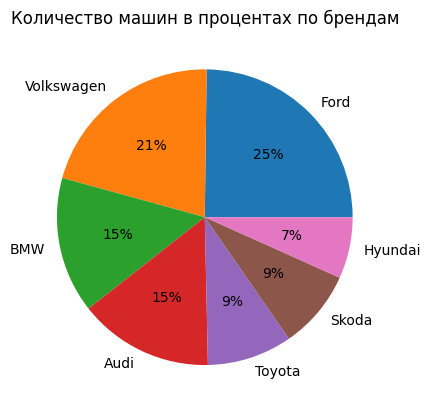

In [6]:
plt.title('Количество машин в процентах по брендам')
plt.pie(group, labels=group.index, autopct='%.0f%%')

In [7]:
group_mpg = df.groupby(['make'])['mpg'].mean()
group_mpg = group_mpg.round(2)
group_mpg = group_mpg.sort_values()

(0.0, 70.0)

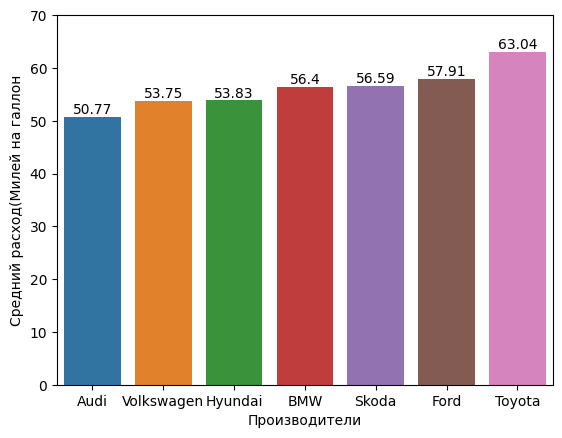

In [8]:
ax = sns.barplot(x=group_mpg.index, y=group_mpg)
for i in ax.containers:
    ax.bar_label(i, )
plt.xlabel('Производители')
plt.ylabel('Средний расход(Милей на галлон')
plt.ylim(0, 70)

In [9]:
df['transmission'] = df['transmission'].replace({'Manual': 0, 'Automatic': 1, 'Semi-Auto': 3, 'Other': 4})
df['fuel type'] = df['fuel type'].replace({'Petrol': 0, 'Diesel': 1, 'Hybrid': 2, 'Electric': 3, 'Other': 4})
df['make'] = df['make'].replace(
    {'Audi': 0, 'BMW': 1, 'Ford': 2, 'Volkswagen': 3, 'Toyota': 4, 'Skoda': 5, 'Hyundai': 6})

In [10]:
y = df['price']
X = df.drop(columns={'price', 'model'})

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
scaller = StandardScaler()
X_train = scaller.fit_transform(X_train)
X_test = scaller.transform(X_test)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [14]:
MSE_train = mean_squared_error(y_train, pred_train)
RMSE_train = mean_squared_error(y_train, pred_train, squared=False)
R2_train = r2_score(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
RMSE_test = mean_squared_error(y_test, pred_test, squared=False)
R2_test = r2_score(y_test, pred_test)

In [15]:
print(
    f'Метрика (MSE) для обучающей выборки:{round(MSE_train, 2)}\nМетрика (MSE) для тестовой выборки:{round(MSE_test, 2)}\n'
    f'Метрика (R2) для обучающей выборки:{round(R2_train, 2)}\nМетрика (R2) для тестовой выборки:{round(R2_test, 2)}\n'
    f'Метрика (RMSE) для обучающей выборки:{round(RMSE_train, 2)}\nМетрика (RMSE) для тестовой выборки:{round(RMSE_test, 2)}')

Метрика (MSE) для обучающей выборки:21917782.78
Метрика (MSE) для тестовой выборки:22212582.0
Метрика (R2) для обучающей выборки:0.74
Метрика (R2) для тестовой выборки:0.75
Метрика (RMSE) для обучающей выборки:4681.64
Метрика (RMSE) для тестовой выборки:4713.02


In [42]:
model_tree = DecisionTreeRegressor(max_depth=16, min_samples_leaf=3, random_state=1)

In [43]:
model_tree.fit(X_train,y_train)
predict_train = model_tree.predict(X_train)
predict_test = model_tree.predict(X_test)

In [44]:
MSE_train_tree = mean_squared_error(y_train, predict_train)
RMSE_train_tree = mean_squared_error(y_train, predict_train, squared=False)
R2_train_tree = r2_score(y_train, predict_train)
MSE_test_tree = mean_squared_error(y_test, predict_test)
RMSE_test_tree = mean_squared_error(y_test, predict_test, squared=False)
R2_test_tree = r2_score(y_test, predict_test)

In [45]:
print(
    f'Метрика (MSE) для обучающей выборки:{round(MSE_train_tree, 2)}\nМетрика (MSE) для тестовой выборки:{round(MSE_test_tree, 2)}\n'
    f'Метрика (R2) для обучающей выборки:{round(R2_train_tree, 2)}\nМетрика (R2) для тестовой выборки:{round(R2_test_tree, 2)}\n'
    f'Метрика (RMSE) для обучающей выборки:{round(RMSE_train_tree, 2)}\nМетрика (RMSE) для тестовой выборки:{round(RMSE_test_tree, 2)}')

Метрика (MSE) для обучающей выборки:2799794.03
Метрика (MSE) для тестовой выборки:5659282.25
Метрика (R2) для обучающей выборки:0.97
Метрика (R2) для тестовой выборки:0.94
Метрика (RMSE) для обучающей выборки:1673.26
Метрика (RMSE) для тестовой выборки:2378.92


Результаты

Линейная регрессия себя показала не лучшим образом, метрики плохие. Хоть и различие по RMSE в линейной модели составляет порядка 5 тысяч, и для данного целевого значения это отклонение не является фатальным, но не следует применять данную модель на практике. Модель дерева решений показала лучший результат, оптимальные параметры были подобраны автоматическим путем